In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Library/Python/3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/Library/Python/3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
import sys
sys.path.insert(0, '../scripts')

import util

## Bin-wise combination 

### SWGM Tests

In [3]:
import swgm

In [4]:
y, sr = librosa.load('../data/example.wav', sr=44100)

In [5]:
specs = util.get_spectrograms(y, windows=[512, 1024, 4096])
specs = util.interpol_and_normalize(specs)

In [6]:
SWGM_spec = swgm.SWGM(specs)

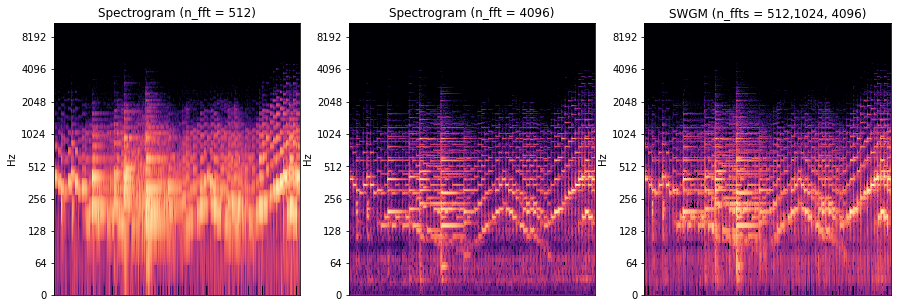

In [7]:
plt.figure(figsize=[15,5])

plt.subplot(1,3,1)
plt.title('Spectrogram (n_fft = 512)')
librosa.display.specshow(librosa.power_to_db(specs[0], ref=np.max), y_axis='log')

plt.subplot(1,3,2)
plt.title('Spectrogram (n_fft = 4096)')
librosa.display.specshow(librosa.power_to_db(specs[-1], ref=np.max), y_axis='log')

plt.subplot(1,3,3)
plt.title('SWGM (n_ffts = 512,1024, 4096)')
librosa.display.specshow(librosa.power_to_db(SWGM_spec, ref=np.max), y_axis='log')

## Local information combination

### Lukin & Todd 

In [8]:
import lukin_todd

In [9]:
y, sr = librosa.load('../data/example.wav', sr=44100)
y = y[:2*sr] # since LT is so cost intensive, test on short signal

In [10]:
specs = util.get_spectrograms(y, windows=[512, 1024, 4096])
specs = util.interpol_and_normalize(specs)

In [11]:
LT_spec = lukin_todd.lukin_todd(specs, [11,5])

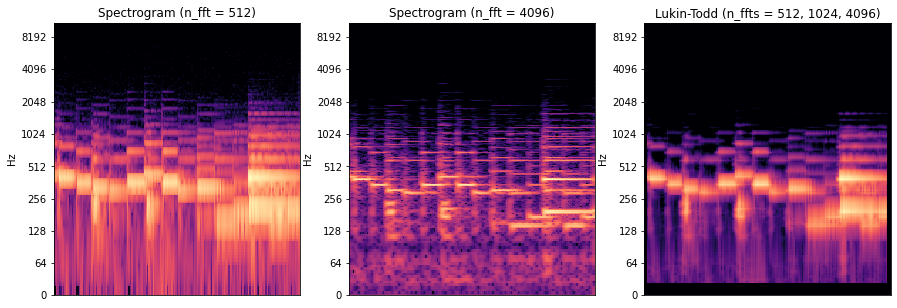

In [12]:
plt.figure(figsize=[15,5])

plt.subplot(1,3,1)
plt.title('Spectrogram (n_fft = 512)')
librosa.display.specshow(librosa.power_to_db(specs[0], ref=np.max), y_axis='log')

plt.subplot(1,3,2)
plt.title('Spectrogram (n_fft = 4096)')
librosa.display.specshow(librosa.power_to_db(specs[-1], ref=np.max), y_axis='log')

plt.subplot(1,3,3)
plt.title('Lukin-Todd (n_ffts = 512, 1024, 4096)')
librosa.display.specshow(librosa.power_to_db(LT_spec, ref=np.max), y_axis='log')

### Local Sparsity

In [13]:
import local_sparsity

In [14]:
y, sr = librosa.load('../data/example.wav', sr=44100)
y = y[:2*sr] # since LT is so cost intensive, test on short signal

In [15]:
specs = util.get_spectrograms(y, windows=[512, 1024, 4096])
specs = util.interpol_and_normalize(specs)
kernel_analysis = [11,11]
kernel_energy_compensation = [7,7]

In [16]:
LS_spec = local_sparsity.local_sparsity(specs, kernel_analysis, kernel_energy_compensation)

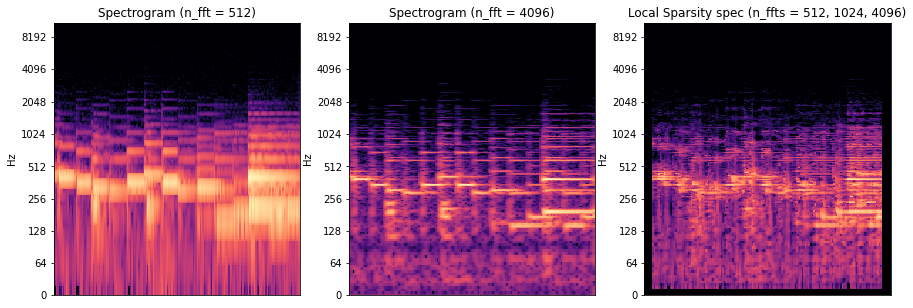

In [17]:
plt.figure(figsize=[15,5])

plt.subplot(1,3,1)
plt.title('Spectrogram (n_fft = 512)')
librosa.display.specshow(librosa.power_to_db(specs[0], ref=np.max), y_axis='log')

plt.subplot(1,3,2)
plt.title('Spectrogram (n_fft = 4096)')
librosa.display.specshow(librosa.power_to_db(specs[-1], ref=np.max), y_axis='log')

plt.subplot(1,3,3)
plt.title('Local Sparsity spec (n_ffts = 512, 1024, 4096)')
librosa.display.specshow(librosa.power_to_db(LS_spec, ref=np.max), y_axis='log')

### Smoothed Local Sparsity

In [18]:
SLS_spec = local_sparsity.smoothed_local_sparsity(specs, kernel_analysis, kernel_energy_compensation)

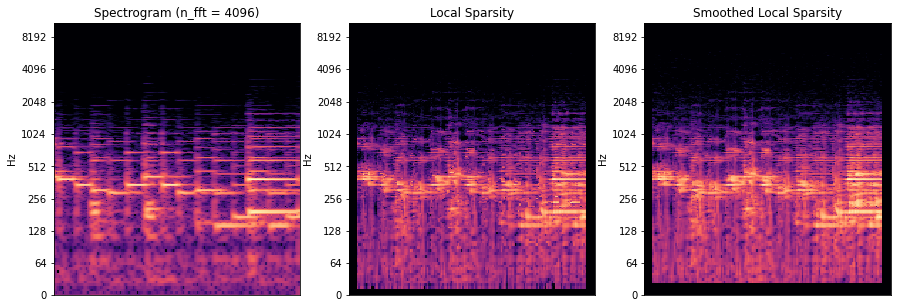

In [20]:
plt.figure(figsize=[15,5])

plt.subplot(1,3,1)
plt.title('Spectrogram (n_fft = 4096)')
librosa.display.specshow(librosa.power_to_db(specs[-1], ref=np.max), y_axis='log')

plt.subplot(1,3,2)
plt.title('Local Sparsity')
librosa.display.specshow(librosa.power_to_db(LS_spec, ref=np.max), y_axis='log')

plt.subplot(1,3,3)
plt.title('Smoothed Local Sparsity')
librosa.display.specshow(librosa.power_to_db(SLS_spec, ref=np.max), y_axis='log')